In [ ]:
# 時系列データのさまざまな異常・変化の例

In [3]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
cmap = plt.get_cmap("tab10")

In [2]:
number_of_points = 1000

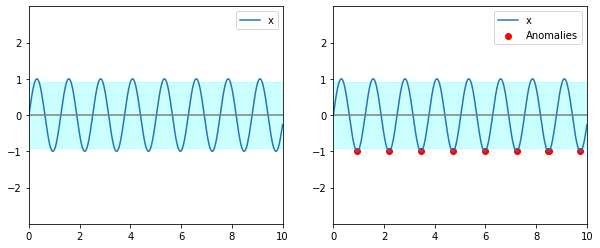

In [11]:
# サイン波のデータを作成し、グラフを表示する
def plot_sin_wave():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    df_xy = pd.DataFrame({'x':x, 'y':y})
    X = df_xy[['y']]
    model = IsolationForest(contamination=0.01, random_state=42)
    model.fit(X)
    df_xy['Anomaly'] = model.predict(X)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(y)-2, max(y)+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    plt.scatter(df_xy['x'][df_xy['Anomaly'] == -1], df_xy['y'][df_xy['Anomaly'] == -1], color='red', label='Anomalies')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(y)-2, max(y)+2)
    ax[1].legend()
    plt.show()

plot_sin_wave()

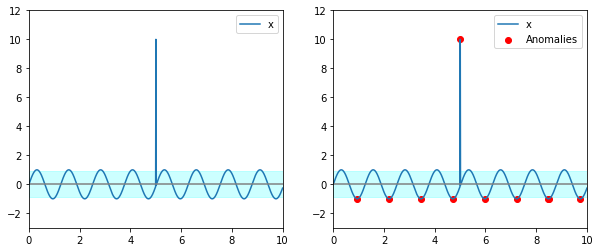

In [8]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)] = 10
    df_xy = pd.DataFrame({'x':x, 'y':y})
    X = df_xy[['y']]
    model = IsolationForest(contamination=0.01, random_state=42)
    model.fit(X)
    df_xy['Anomaly'] = model.predict(X)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(y)-2, max(y)+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    plt.scatter(df_xy['x'][df_xy['Anomaly'] == -1], df_xy['y'][df_xy['Anomaly'] == -1], color='red', label='Anomalies')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(y)-2, max(y)+2)
    ax[1].legend()
    plt.show()

plot_sin_wave_with_anomaly()

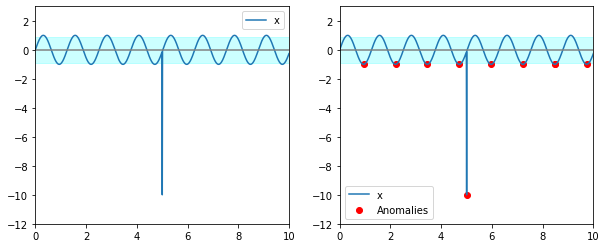

In [12]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)] = -10
    df_xy = pd.DataFrame({'x':x, 'y':y})
    X = df_xy[['y']]
    model = IsolationForest(contamination=0.01, random_state=42)
    model.fit(X)
    df_xy['Anomaly'] = model.predict(X)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(y)-2, max(y)+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    plt.scatter(df_xy['x'][df_xy['Anomaly'] == -1], df_xy['y'][df_xy['Anomaly'] == -1], color='red', label='Anomalies')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(y)-2, max(y)+2)
    ax[1].legend()
    plt.show()
    
plot_sin_wave_with_anomaly()

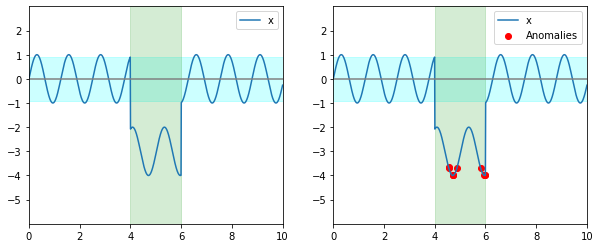

In [21]:
# 突然変異を含むサイン波のデータを作成し、グラフを表示する
window = 100
def plot_sin_wave_with_change():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)-window:int(number_of_points/2)+window] = y[int(number_of_points/2)-window:int(number_of_points/2)+window] - 3
    df_xy = pd.DataFrame({'x':x, 'y':y})
    X = df_xy[['y']]
    model = IsolationForest(contamination=0.01, random_state=42)
    model.fit(X)
    df_xy['Anomaly'] = model.predict(X)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(y)-2, max(y)+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    plt.scatter(df_xy['x'][df_xy['Anomaly'] == -1], df_xy['y'][df_xy['Anomaly'] == -1], color='red', label='Anomalies')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(y)-2, max(y)+2)
    ax[1].legend()
    plt.show()


plot_sin_wave_with_change()

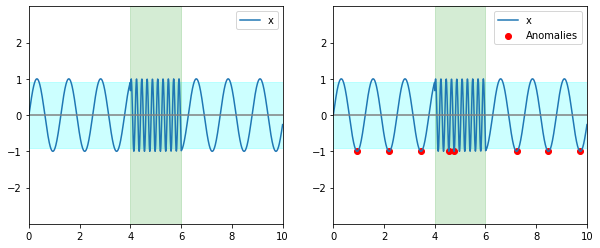

In [18]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
window = 100
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)-window:int(number_of_points/2)+window] = np.sin(30*x[int(number_of_points/2)-window:int(number_of_points/2)+window])
    df_xy = pd.DataFrame({'x':x, 'y':y})
    X = df_xy[['y']]
    model = IsolationForest(contamination=0.01, random_state=42)
    model.fit(X)
    df_xy['Anomaly'] = model.predict(X)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(y)-2, max(y)+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    plt.scatter(df_xy['x'][df_xy['Anomaly'] == -1], df_xy['y'][df_xy['Anomaly'] == -1], color='red', label='Anomalies')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(y)-2, max(y)+2)
    ax[1].legend()
    plt.show()

plot_sin_wave_with_anomaly()

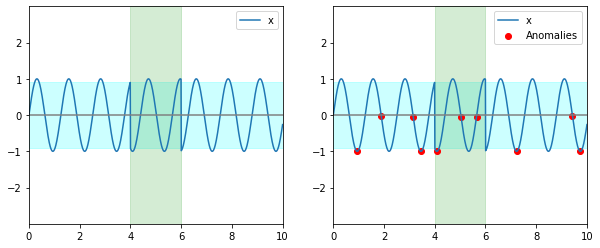

In [19]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
window = 100
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)-window:int(number_of_points/2)+window] = np.sin(5*x[int(number_of_points/2)-window:int(number_of_points/2)+window]+np.pi)
    df_xy = pd.DataFrame({'x':x, 'y':y})
    X = df_xy[['y']]
    model = IsolationForest(contamination=0.01, random_state=42)
    model.fit(X)
    df_xy['Anomaly'] = model.predict(X)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(y)-2, max(y)+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    plt.scatter(df_xy['x'][df_xy['Anomaly'] == -1], df_xy['y'][df_xy['Anomaly'] == -1], color='red', label='Anomalies')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(y)-2, max(y)+2)
    ax[1].legend()
    plt.show()
        
plot_sin_wave_with_anomaly()